# Dataset Description

1. Transaction_ID: Unique identifier for each transaction.
2. Timestamp: Date and time of the transaction.
3. Vehicle_Type: Type of vehicle involved in the transaction.
4. FastagID: Unique identifier for Fastag.
5. TollBoothID: Identifier for the toll booth.
6. Lane_Type: Type of lane used for the transaction.
7. Vehicle_Dimensions: Dimensions of the vehicle.
8. Transaction_Amount: Amount associated with the transaction.
9. Amount_paid: Amount paid for the transaction.
10. Geographical_Location: Location details of the transaction.
11. Vehicle_Speed: Speed of the vehicle during the transaction.
12. Vehicle_Plate_Number: License plate number of the vehicle.
13. Fraud_indicator: Binary indicator of fraudulent activity (target variable).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df=pd.read_csv('FastagFraudDetection.csv')

In [4]:
df.sample(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
3800,3801,8/15/2023 8:40,Sedan,FTG-108-PLM-432,A-101,Express,Medium,120,120,"12.84197701525119, 77.67547528176169",46,TN56CD8901,Not Fraud
2529,2530,1/6/2023 21:04,Car,FTG-130-LPO-098,A-101,Regular,Small,120,120,"13.059816123454882, 77.77068662374292",82,KA56BC0121,Not Fraud
516,517,5/23/2023 6:30,Sedan,FTG-517-LKI-113,A-101,Express,Medium,100,100,"13.042660878688794, 77.47580097259879",93,KA58UV2345,Not Fraud
339,340,5/19/2023 11:05,Truck,FTG-340-POU-213,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",77,KA46QR4557,Fraud
3345,3346,12/12/2023 5:05,Sedan,FTG-698-VFR-876,A-101,Regular,Medium,100,100,"13.042660878688794, 77.47580097259879",56,KA45IJ5678,Not Fraud


In [5]:
df.shape

(5000, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [7]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [8]:
[features for features in df.columns if df[features].isnull().sum()>0]

['FastagID']

In [9]:
df.describe(include='object')

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/1/2023 8:15,Bus,FTG-001-ABC-121,B-102,Regular,Large,"13.059816123454882, 77.77068662374292",KA11AB1234,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


In [10]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [11]:
column_values= ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Fraud_indicator']

for column in column_values:
    print(f'Unique values for {column}:')
    print(df[column].unique())
    print()


Unique values for Vehicle_Type:
['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']

Unique values for TollBoothID:
['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']

Unique values for Lane_Type:
['Express' 'Regular']

Unique values for Vehicle_Dimensions:
['Large' 'Small' 'Medium']

Unique values for Fraud_indicator:
['Fraud' 'Not Fraud']



In [12]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


# Exploratory Data Analysis

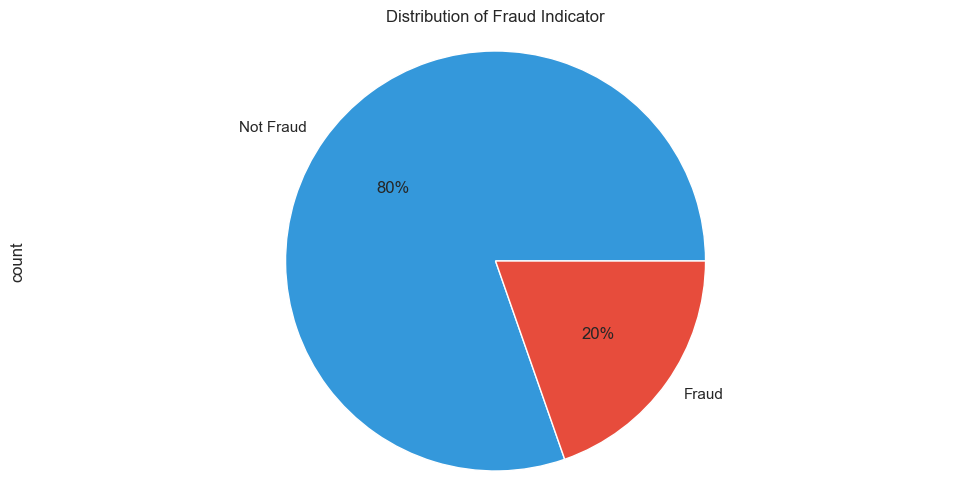

In [186]:
colors = ['#3498db', '#e74c3c']
df['Fraud_indicator'].value_counts().plot(kind='pie', autopct='%1.f%%', colors=colors)
plt.title('Distribution of Fraud Indicator')
plt.axis('equal') 
plt.show()

Here, the output indicates that the 'Fraud_indicator' values are imbalanced, with 80% classified as Not Fraud and 20% as Fraud. This imbalance in the dataset could potentially pose challenges for model training and may need to be addressed to ensure a more balanced representation of both classes.

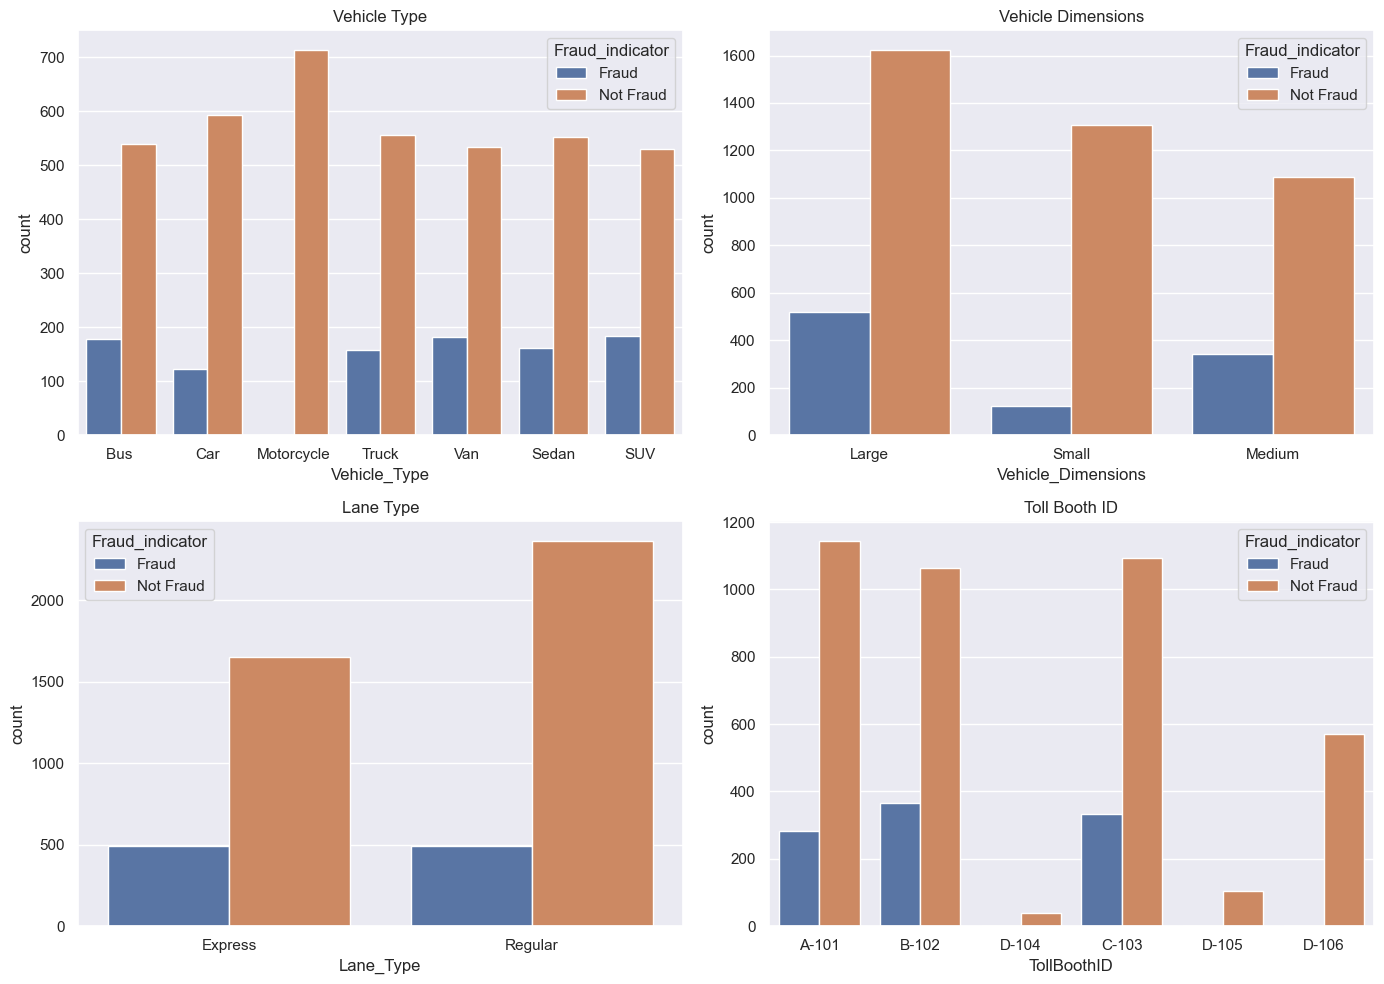

In [183]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot countplots in each subplot
sns.countplot(x='Vehicle_Type', data=df, hue='Fraud_indicator', ax=axes[0, 0])
axes[0, 0].set_title('Vehicle Type')

sns.countplot(x='Vehicle_Dimensions', data=df, hue='Fraud_indicator', ax=axes[0, 1])
axes[0, 1].set_title('Vehicle Dimensions')

sns.countplot(x='Lane_Type', data=df, hue='Fraud_indicator', ax=axes[1, 0])
axes[1, 0].set_title('Lane Type')

sns.countplot(x='TollBoothID', data=df, hue='Fraud_indicator', ax=axes[1, 1])
axes[1, 1].set_title('Toll Booth ID')

# Adjust layout for better spacing
plt.tight_layout()

# Vehicle_Type:


| Vehicle_Type | Fraud_indicator | Count |
|--------------|-----------------|-------|
| Bus          | Fraud           | 177   |
| Bus          | Not Fraud       | 539   |
| Car          | Fraud           | 122   |
| Car          | Not Fraud       | 592   |
| Motorcycle   | Not Fraud       | 714   |
| SUV          | Fraud           | 184   |
| SUV          | Not Fraud       | 530   |
| Sedan        | Fraud           | 161   |
| Sedan        | Not Fraud       | 553   |
| Truck        | Fraud           | 158   |
| Truck        | Not Fraud       | 556   |
| Van          | Fraud           | 181   |
| Van          | Not Fraud       | 533   |

# TollBoothID:

| Fraud_indicator | TollBoothID | Vehicle_Type | Fraud | Not Fraud |
|-----------------|-------------|--------------|-------|-----------|
| 1               | A-101       | Bus          | 2     | 2         |
| 2               | A-101       | Car          | 120   | 590       |
| 3               | A-101       | Sedan        | 161   | 553       |
| 4               | B-102       | Car          | 2     | 2         |
| 5               | B-102       | SUV          | 184   | 530       |
| 6               | B-102       | Van          | 181   | 533       |
| 7               | C-103       | Bus          | 175   | 537       |
| 8               | C-103       | Truck        | 158   | 556       |
| 9               | D-104       | Motorcycle   | 0     | 40        |
| 10              | D-105       | Motorcycle   | 0     | 104       |
| 11              | D-106       | Motorcycle   | 0     | 570       |

# General Insights:
    1.Motorcycles haven't been involved in any recorded fraud instances across all TollBooths.
    2.SUVs have a relatively high count of both fraud and not fraud instances.
    3.Buses, Sedans, Trucks, and Vans show a mix of fraud and not fraud instances.


Text(0, 0.5, 'Count of Fraudulent Transactions')

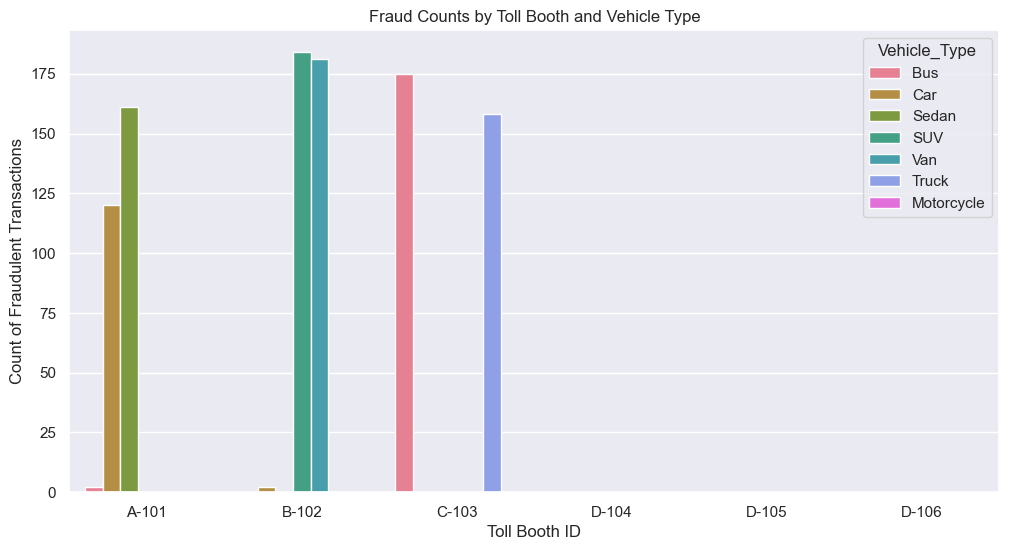

In [182]:
derived = df.groupby(['TollBoothID','Vehicle_Type','Fraud_indicator']).size().reset_index(name='Count')
derived_pivot = derived.pivot_table(index=['TollBoothID', 'Vehicle_Type'], columns='Fraud_indicator', values='Count', fill_value=0).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='TollBoothID', y='Fraud', data=derived_pivot, hue='Vehicle_Type', palette=unique_colors, dodge=True)
plt.title('Fraud Counts by Toll Booth and Vehicle Type')
plt.xlabel('Toll Booth ID')
plt.ylabel('Count of Fraudulent Transactions')

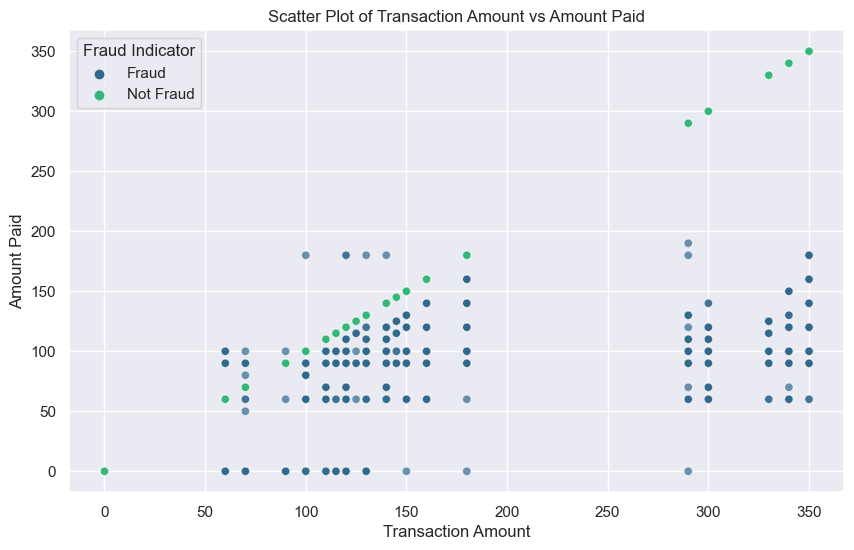

In [181]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transaction_Amount', y='Amount_paid', hue='Fraud_indicator', data=df, palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Transaction Amount vs Amount Paid')
plt.xlabel('Transaction Amount')
plt.ylabel('Amount Paid')
plt.legend(title='Fraud Indicator')

Upon close examination of the data, it becomes evident that instances of fraud tend to occur when the Transaction amount is either significantly lower or higher to  Amount paid. Conversely, when the Transaction amount is equal to Amount paid, it generally corresponds to non-fraudulent transactions.

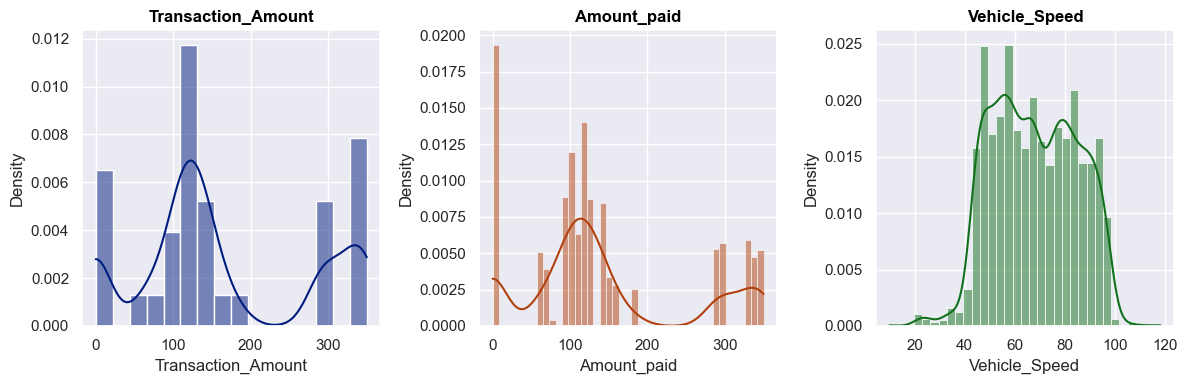

In [180]:
numerical_columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

sns.set_style('darkgrid')
colors = sns.color_palette(palette='dark', n_colors=len(numerical_columns))
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], color=colors[i], kde=True, fill=True, stat='density', ax=axs[i])
    axs[i].set_title(col, color='black', fontweight='bold')

fig.tight_layout()

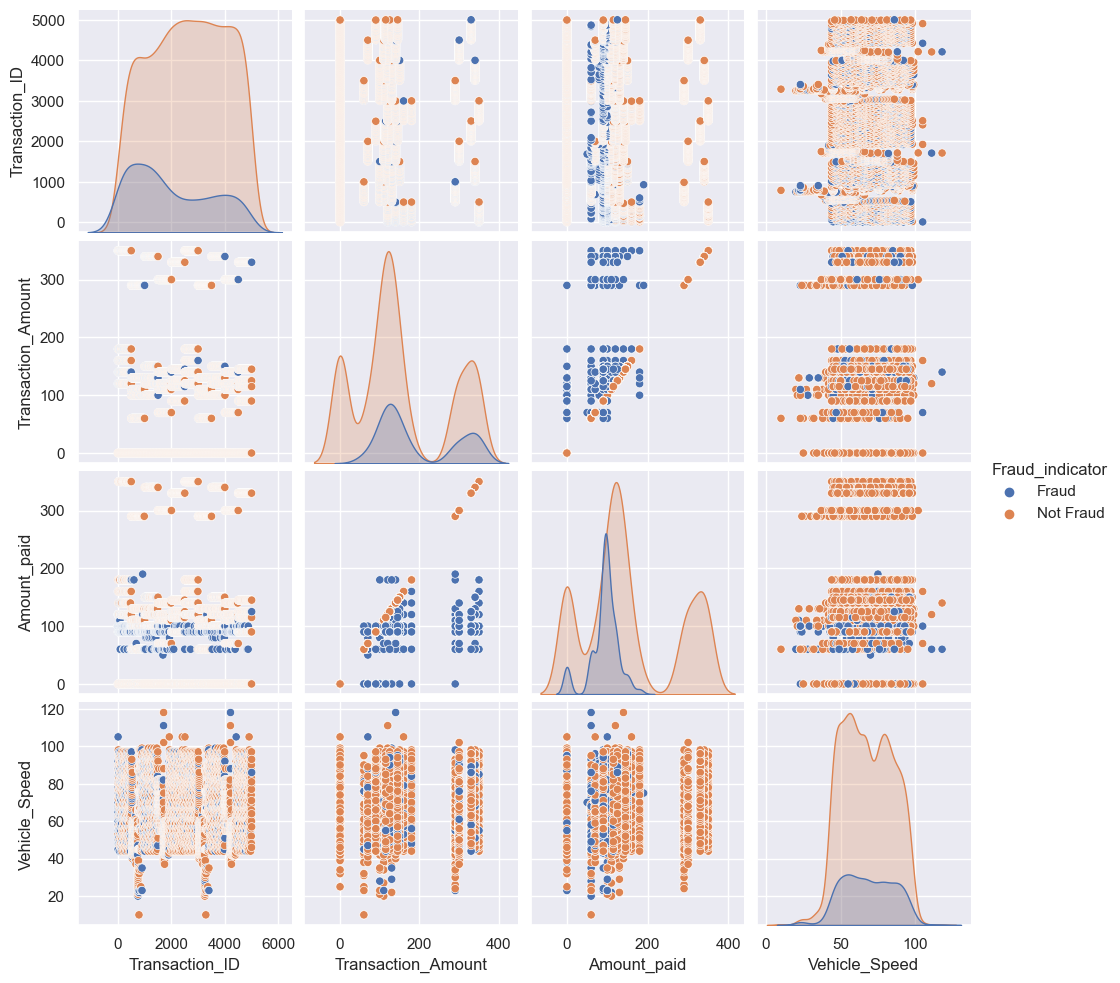

In [170]:
sns.pairplot(df,hue='Fraud_indicator')

# Timestamp:

In [190]:
# Convert 'Timestamp' to datetime format if it's not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract components
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month


In [206]:
#dropping column timestamp
df=df.drop('Timestamp', axis=1)

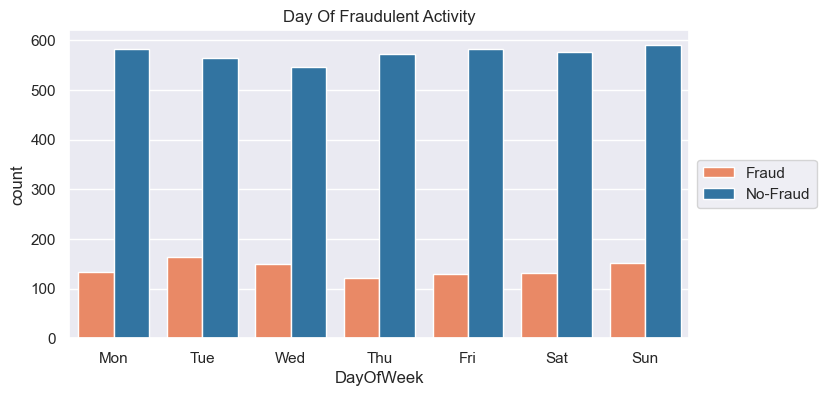

In [215]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='DayOfWeek', hue='Fraud_indicator', palette=['#ff7f50', '#1f77b4'])
plt.title('Day Of Fraudulent Activity')
plt.legend(labels=['Fraud', 'No-Fraud'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

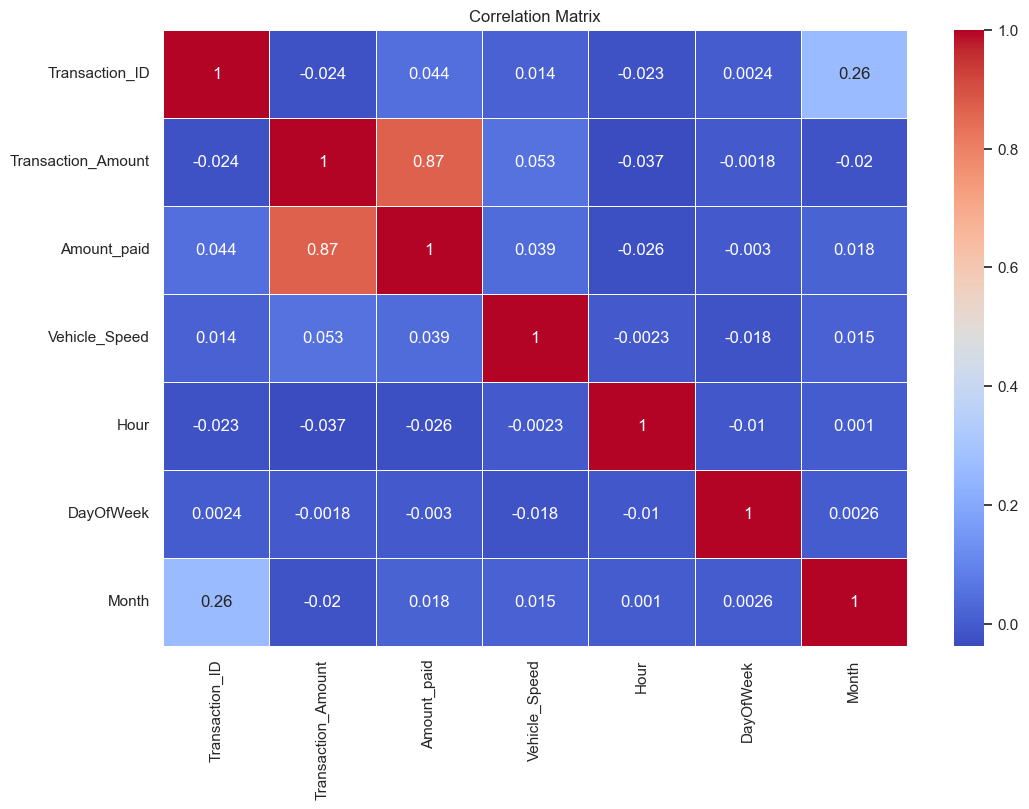

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Feature Engineering

In [205]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Display DataFrame with missing FastagID for specified columns
print(df[df['FastagID'].isnull()][['Vehicle_Type','TollBoothID', 'FastagID']])

# Reset display options to default
pd.reset_option('display.max_rows')

     Vehicle_Type TollBoothID FastagID
2      Motorcycle       D-104      NaN
9      Motorcycle       D-104      NaN
16     Motorcycle       D-104      NaN
23     Motorcycle       D-104      NaN
30     Motorcycle       D-104      NaN
37     Motorcycle       D-104      NaN
44     Motorcycle       D-104      NaN
51     Motorcycle       D-104      NaN
58     Motorcycle       D-104      NaN
65     Motorcycle       D-104      NaN
72     Motorcycle       D-104      NaN
79     Motorcycle       D-104      NaN
86     Motorcycle       D-104      NaN
93     Motorcycle       D-104      NaN
100    Motorcycle       D-104      NaN
107    Motorcycle       D-104      NaN
114    Motorcycle       D-104      NaN
121    Motorcycle       D-104      NaN
128    Motorcycle       D-104      NaN
135    Motorcycle       D-104      NaN
142    Motorcycle       D-105      NaN
149    Motorcycle       D-105      NaN
156    Motorcycle       D-105      NaN
163    Motorcycle       D-105      NaN
170    Motorcycle       D

It seems like for all the motorcycle transactions at TollBooths D-104, D-105, and D-106, the 'FastagID' is missing or NaN. This could be due to various reasons, such as motorcycles not being required to have Fastags in the system, or it might be an anomaly or missing data in the dataset.Missing 'FastagID' is not critical for my analysis, I can choose to drop rows with missing values.